In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('covid_data.csv')
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [4]:
df.info()

df.shape
df.columns.tolist()

df.dtypes

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

In [5]:
print(df.describe())
print(df.describe().T)

              USMER  MEDICAL_UNIT           SEX  PATIENT_TYPE       INTUBED  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.632194e+00  8.980565e+00  1.499259e+00  1.190765e+00  7.952288e+01   
std    4.822084e-01  3.723278e+00  4.999997e-01  3.929041e-01  3.686889e+01   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.000000e+00  4.000000e+00  1.000000e+00  1.000000e+00  9.700000e+01   
50%    2.000000e+00  1.200000e+01  1.000000e+00  1.000000e+00  9.700000e+01   
75%    2.000000e+00  1.200000e+01  2.000000e+00  1.000000e+00  9.700000e+01   
max    2.000000e+00  1.300000e+01  2.000000e+00  2.000000e+00  9.900000e+01   

          PNEUMONIA           AGE      PREGNANT      DIABETES          COPD  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   3.346831e+00  4.179410e+01  4.976558e+01  2.186404e+00  2.260569e+00   
std    1.191288e+01  1.690739e+01  4.751073e+01  5.

ISDEAD
0    971633
1     76942
Name: count, dtype: int64
------
USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
DATE_DIED_CLEAN         971633
ISDEAD                       0
dtype: int64
3260354
------
Missing values percentage:
USMER                    0.00
MEDICAL_UNIT             0.00
SEX                      0.00
PATIENT_TYPE             0.00
DATE_DIED                0.00
INTUBED           

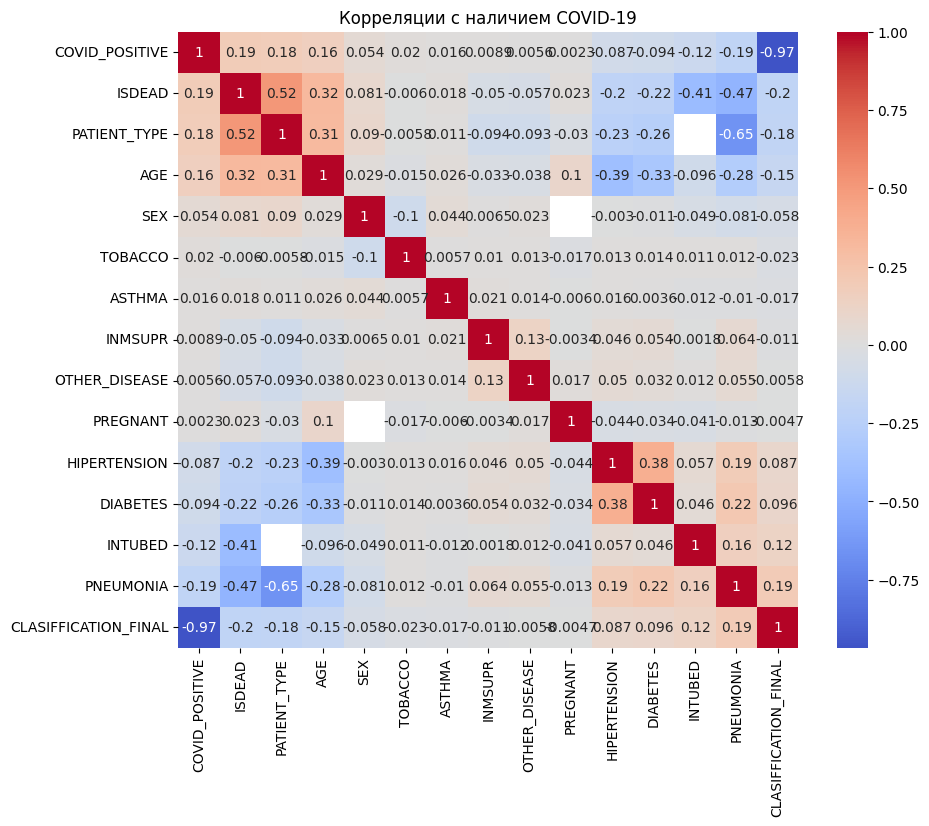

In [ ]:
df.loc[df['SEX'] == 2, 'PREGNANT'] = 98

df_disease = df[['DIABETES', 'COPD', 'ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC' ]] == 1 
df_disease

categorical = ['SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'CARDIOVASCULAR', 'OBESITY', 'TOBACCO', 'ICU']

df = df.replace([97, 98, 99], np.nan)

df['DATE_DIED_CLEAN'] = df['DATE_DIED'].replace('9999-99-99', np.nan)
df['ISDEAD'] = df['DATE_DIED_CLEAN'].notnull().astype(int)
print(df['ISDEAD'].value_counts())

print('------')

print(df.isnull().sum())
print(df.isnull().sum().sum())

print('------')

missing_percent = (df.isnull().sum() / len(df)) * 100
print("Missing values percentage:")
print(missing_percent.round(2))

#для категории tobaco выходит 0.31% 
print('------')

df_clean = df.dropna(subset=['TOBACCO'])
print(f"After dropping missing TOBACCO: {df_clean.shape}")


df['COVID_POSITIVE'] = (df['CLASIFFICATION_FINAL'] <= 3).astype(int)

numeric_cols = df.select_dtypes(include=[np.number]).columns
covid_corr = df[numeric_cols].corr()['COVID_POSITIVE'].sort_values(ascending=False)

print("Корреляции с наличием COVID:")
print(covid_corr)

top = covid_corr.head(10).index.tolist() + covid_corr.tail(5).index.tolist()
plt.figure(figsize=(10, 8))
sns.heatmap(df[top].corr(), annot=True, cmap='coolwarm', center=0) #подгляжла в интернете
plt.title('Корреляции с наличием COVID-19')
plt.show()

Смертность по типу пациента и пневмонии:
PATIENT_TYPE  PNEUMONIA
1             1.0          0.149472
              2.0          0.004178
2             1.0          0.431827
              2.0          0.241940
Name: ISDEAD, dtype: float64


<Figure size 600x600 with 0 Axes>

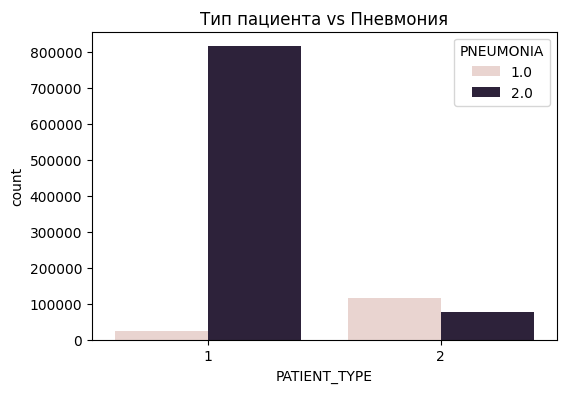

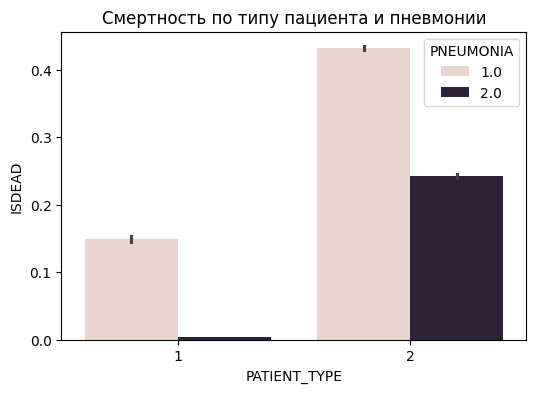

In [15]:
#Я бы хотела изучить корреляцию между PNEUMONIA и PATIENT_TYPE

df['PATIENT_TYPE'].value_counts()
df['PNEUMONIA'].value_counts()


plt.figure(figsize=(6,6))

print("Смертность по типу пациента и пневмонии:")
mortality_analysis = df.groupby(['PATIENT_TYPE', 'PNEUMONIA'])['ISDEAD'].mean()
print(mortality_analysis)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='PATIENT_TYPE', hue='PNEUMONIA')
plt.title('Тип пациента vs Пневмония')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='PATIENT_TYPE', y='ISDEAD', hue='PNEUMONIA') #тоже посёрчила, что hue отвечает за разные цвета
plt.title('Смертность по типу пациента и пневмонии')
plt.show()

ыводы:

1. Из первого графика становится ясно, что среди госпитализированных (2) пациентов с пневмонией значительно больше, чем среди отправленных домой (1). Однако сложно судить из-за различий в выборке.
2. Пневмония однозначно увеличивала риски смертности в обеих группах.

Связь ожирения и сердечных:
OBESITY            1.0     2.0
CARDIOVASCULAR                
1.0               6129   14612
2.0             153470  870814


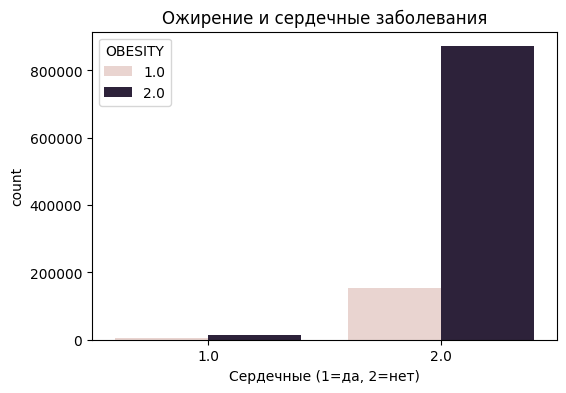

Сердечные по степени ковида:
CLASIFFICATION_FINAL     1     2       3     4      5       6       7
CARDIOVASCULAR                                                       
1.0                    170    83    8253    56    578    1920    9709
2.0                   8344  1732  372006  3062  25382  125727  488477


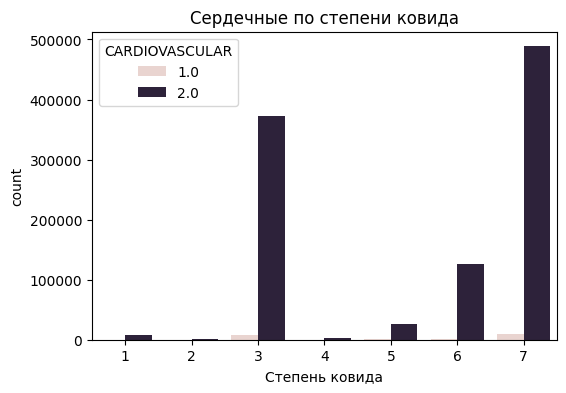

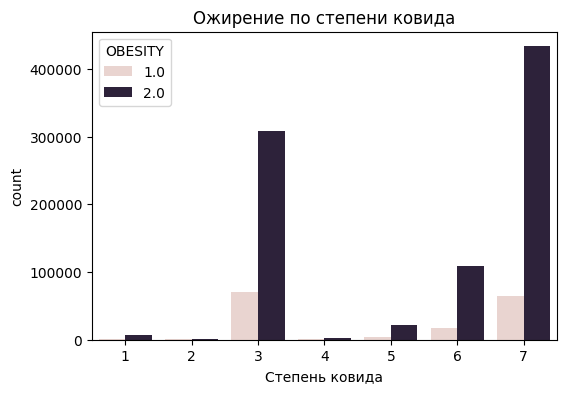

In [20]:
#Теперь хочется рассмотреть взаимосвязь между Cardiovascular and Obesity, а также как эти факторы взаиможействуют с Classifications

df['CARDIOVASCULAR'].value_counts()
df['OBESITY'].value_counts()

print("Связь ожирения и сердечных:")
cross_tab = pd.crosstab(df['CARDIOVASCULAR'], df['OBESITY'])
print(cross_tab)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='CARDIOVASCULAR', hue='OBESITY')
plt.title('Ожирение и сердечные заболевания')
plt.xlabel('Сердечные (1=да, 2=нет)')
plt.show()

# Второй график: сердечные и степень ковида
print("Сердечные по степени ковида:")
heart_by_covid = pd.crosstab(df['CARDIOVASCULAR'], df['CLASIFFICATION_FINAL'])
print(heart_by_covid)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='CLASIFFICATION_FINAL', hue='CARDIOVASCULAR')
plt.title('Сердечные по степени ковида')
plt.xlabel('Степень ковида')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='CLASIFFICATION_FINAL', hue='OBESITY')
plt.title('Ожирение по степени ковида')
plt.xlabel('Степень ковида')
plt.show()

In [23]:
most_common = df['CLASIFFICATION_FINAL'].value_counts().index[0]
print(f"Самая частая степень ковида: {most_common}")


second_common = df['CLASIFFICATION_FINAL'].value_counts().index[1]
print(f"Вторая по частоте степень: {second_common}")

Самая частая степень ковида: 7
Вторая по частоте степень: 3


Выводы:

1.Ожирение не является основным фактором для сердечных заболеваний. 
2. и 3. Нельзя делать каких-либо выводов касательно взаимосвязи ковида с ожирением и сердечными заболеваниями, так как 3 и 7 - самые большие выборки и они несоизмеримы с другими

Самый младший участник датасета: 0.0
Самый старший участник датасета: 121.0
Средний возраст: 41.775650382072634
Медиана возрастов: 40.0


/tmp/ipykernel_186984/2008205110.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='SEX', y='AGE', data=df, palette=['lightpink', 'lightblue'])


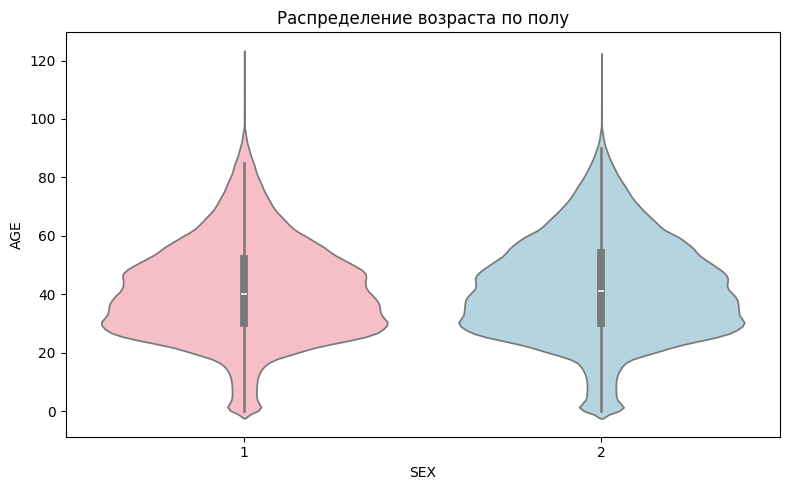

Количество людей на каждую возрастную группу:
AGE_GROUP
0-20       73746
21-40     449919
41-60     376676
61-80     125088
81-100     18801
100+         138
Name: count, dtype: int64


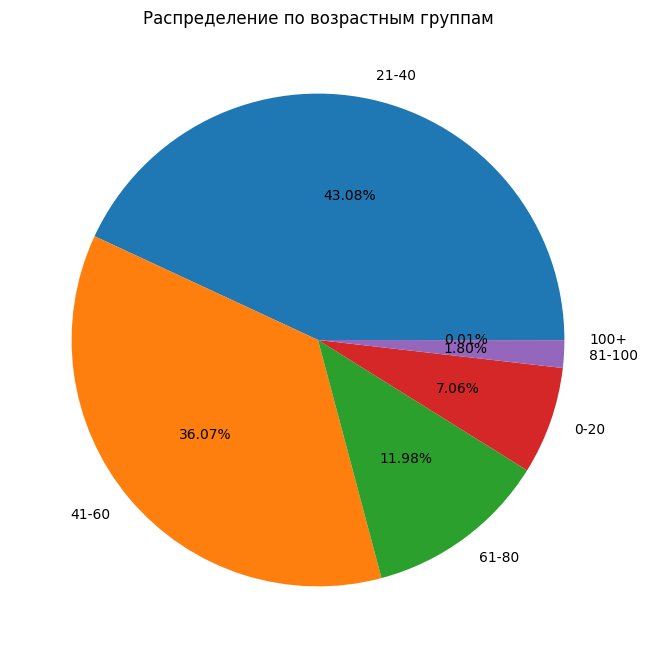

КОЛИЧЕСТВО ЗАРАЖЁННЫХ И НЕЗАРАЖЁННЫХ
COVID+ пациентов (1-3): 391979
COVID- пациентов (4+): 656596


<Figure size 1000x600 with 0 Axes>

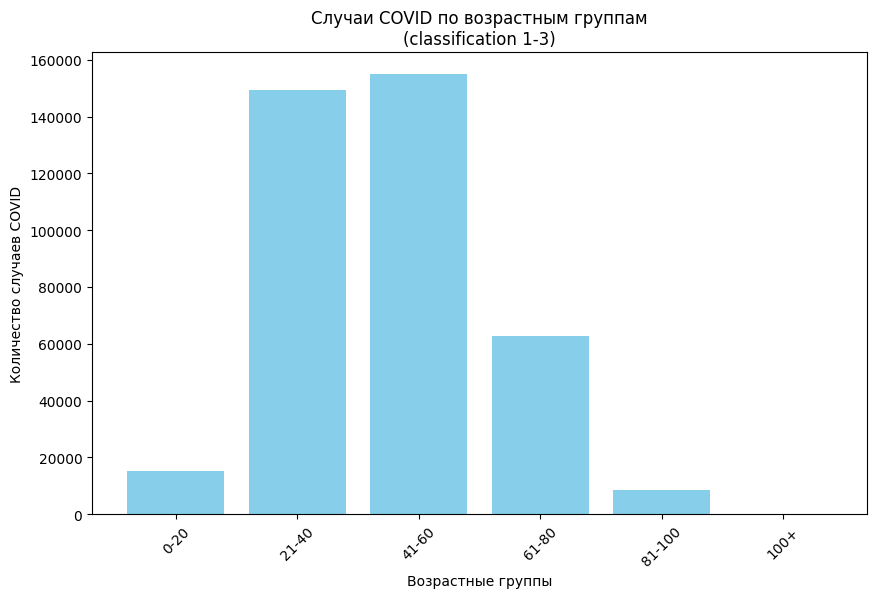

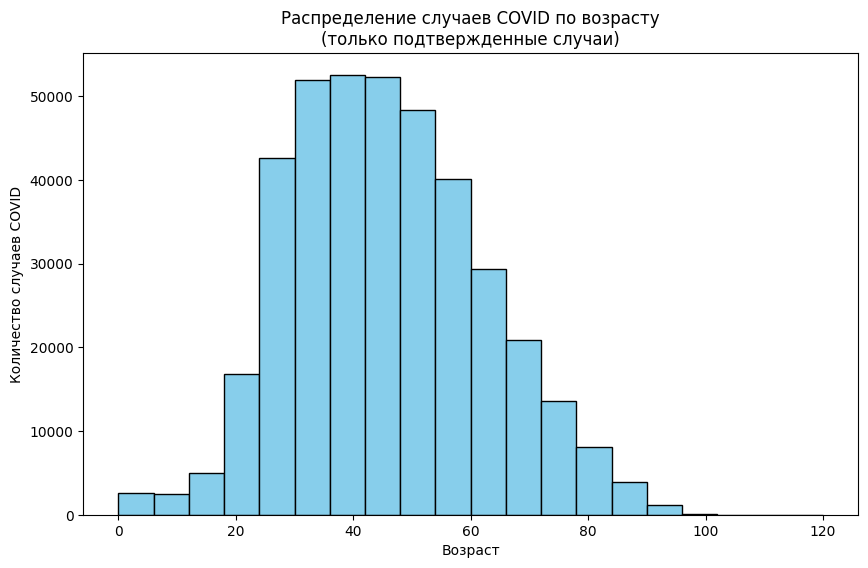

Распределение CLASIFFICATION_FINAL:
CLASIFFICATION_FINAL
1      8601
2      1851
3    381527
4      3122
5     26091
6    128133
7    499250
Name: count, dtype: int64
Смертность по возрастным группам (COVID+ пациенты):
               mean   count
AGE_GROUP                  
0-20       0.012968   15346
21-40      0.024574  149506
41-60      0.134076  154942
61-80      0.396641   62825
81-100     0.538325    8467
100+       0.347826      23


/tmp/ipykernel_186984/2008205110.py:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mortality_by_age = covid_positive.groupby('AGE_GROUP')['ISDEAD'].agg(['mean', 'count']) #посчитаем по среднему


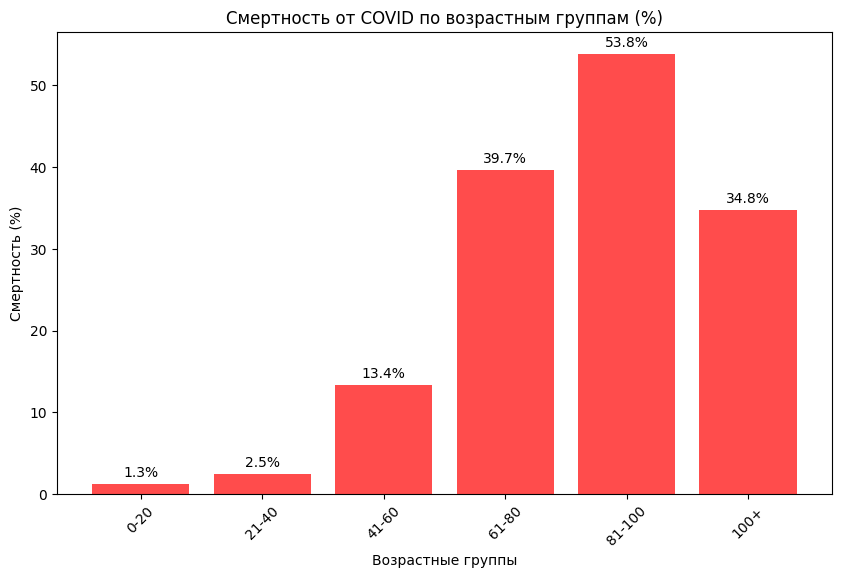

In [ ]:
#можно ли утверждать, что люди смертность возрастала с возрастом 

min_age = df['AGE'].min()
print(f"Самый младший участник датасета: {df['AGE'].min()}") 
max_age = df['AGE'].max()
print(f"Самый старший участник датасета: {df['AGE'].max()}")

print(f"Средний возраст: {df['AGE'].mean()}")
print(f"Медиана возрастов: {df['AGE'].median()}")


plt.figure(figsize=(8, 5))
sns.violinplot(x='SEX', y='AGE', data=df, palette=['lightpink', 'lightblue']) #скрипки/виолончели мы немного затрагивали с Никитой
plt.title('Распределение возраста по полу')
plt.tight_layout()
plt.show()

#для себя - ради своего любопытства
#print("\nДетальная информация о пациентах старше 100 лет:")
#very_old_age = df[df['AGE'] >= 100]
#if len(very_old_age) > 0:
#    print(very_old_age[['AGE', 'SEX', 'ISDEAD', 'DIABETES', 'CARDIOVASCULAR']])
    
# Создаю собственные bins
bins = [0, 20, 40, 60, 80, 100, df['AGE'].max()]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '100+']

df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels)

print('Количество людей на каждую возрастную группу:')
age_count= df['AGE_GROUP'].value_counts().sort_index()
print(age_count)



age_pct = df['AGE_GROUP'].value_counts(normalize=True) * 100 #про normalize подглядела

plt.figure(figsize=(8, 8))
plt.pie(age_pct, labels=age_pct.index, autopct='%1.2f%%')
plt.title('Распределение по возрастным группам')
plt.show()

print("КОЛИЧЕСТВО ЗАРАЖЁННЫХ И НЕЗАРАЖЁННЫХ")
print(f"COVID+ пациентов (1-3): {len(df[df['CLASIFFICATION_FINAL'] <= 3])}")
print(f"COVID- пациентов (4+): {len(df[df['CLASIFFICATION_FINAL'] >= 4])}")

plt.figure(figsize=(10, 6))
covid_cases = df[df['CLASIFFICATION_FINAL'] <= 3]['AGE_GROUP'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(covid_cases.index, covid_cases.values, color='skyblue')
plt.title('Случаи COVID по возрастным группам\n(classification 1-3)')
plt.xlabel('Возрастные группы')
plt.ylabel('Количество случаев COVID')
plt.xticks(rotation=45) #про rotation подглядела
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(df[df['CLASIFFICATION_FINAL'] <= 3]['AGE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение случаев COVID по возрасту\n(только подтвержденные случаи)')
plt.xlabel('Возраст')
plt.ylabel('Количество случаев COVID')
plt.show()

print("Распределение CLASIFFICATION_FINAL:")
print(df['CLASIFFICATION_FINAL'].value_counts().sort_index())

covid_positive = df[df['CLASIFFICATION_FINAL'] <= 3]

print("Смертность по возрастным группам (COVID+ пациенты):")
mortality_by_age = covid_positive.groupby('AGE_GROUP')['ISDEAD'].agg(['mean', 'count']) #посчитаем по среднему 
print(mortality_by_age)

plt.figure(figsize=(10, 6))
bars = plt.bar(mortality_by_age.index, mortality_by_age['mean'] * 100, color='red', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, #честно признаюсь, спрашивала у ии как правильно оформить для красивой визуализации и про оформление процентиков
            f'{height:.1f}%', ha='center', va='bottom')

plt.title('Смертность от COVID по возрастным группам (%)')
plt.xlabel('Возрастные группы')
plt.ylabel('Смертность (%)')
plt.xticks(rotation=45)
plt.show()

Так как после просмотра графика становится очевидно, что в сегменты 21-40 и 41-60 самые обширные не из-за количества случаев, а из-за количество людей в данной возрастной категории. поэтому требуется нормализация данных.

Но мы попробуем посмотртеь слабую корреляцию (0.31) между AGE и ISDEAD.
